# Applied Data Analysis Course Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns= 163
pd.options.display.max_rows=163

## B. Manipulating the data

In [2]:
df = pd.read_csv('/data/ml_course/02_Data_Analysis/en.openfoodfacts.org.products.csv', index_col=0, parse_dates=[4, 6])
df.head()

,code,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,categories_en,origins,manufacturing_places,labels,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,allergens,allergens_en,traces_en,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_en,main_category_en,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,4559,usda-ndb-import,1489069957,2017-03-09 14:32:37+00:00,1489069957,2017-03-09 14:32:37+00:00,Peanuts,Unknown,Unknown,Unknown,Torn & Glasser,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,b,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,usda-ndb-import,1489055731,2017-03-09 10:35:31+00:00,1489055731,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,Unknown,Unknown,Unknown,Grizzlies,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Organic hazelnuts, organic cashews, organic wa...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,d,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,usda-ndb-import,1489055653,2017-03-09 10:34:13+00:00,1489055653,2017-03-09 10:34:13+00:00,Organic Polenta,Unknown,Unknown,Unknown,Bob's Red Mill,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,Organic polenta,Unknown,Unknown,Unknown,35 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,"To be completed,Nutritio

### Topic 3: Food in the United States

## Keep only relevant data for the task

In [3]:
df = df[df.countries_en.str.contains('United States')]
df.head()

,code,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,categories_en,origins,manufacturing_places,labels,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,allergens,allergens_en,traces_en,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_en,main_category_en,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,4559,usda-ndb-import,1489069957,2017-03-09 14:32:37+00:00,1489069957,2017-03-09 14:32:37+00:00,Peanuts,Unknown,Unknown,Unknown,Torn & Glasser,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,b,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,usda-ndb-import,1489055731,2017-03-09 10:35:31+00:00,1489055731,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,Unknown,Unknown,Unknown,Grizzlies,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Organic hazelnuts, organic cashews, organic wa...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,d,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,usda-ndb-import,1489055653,2017-03-09 10:34:13+00:00,1489055653,2017-03-09 10:34:13+00:00,Organic Polenta,Unknown,Unknown,Unknown,Bob's Red Mill,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,Organic polenta,Unknown,Unknown,Unknown,35 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,"To be completed,Nutritio

Which is the market share of each brand?

In [4]:
df2 = df[df.states_en.str.contains('Brands completed')]
df2.shape

(167738, 122)

In [5]:
brands = df2.brands.value_counts()
brands.sort_values(ascending=False, inplace=True)
brands = brands.to_frame(name='Number of products')
brands.head()

,Number of products
Meijer,1893
Kroger,1619
Ahold,1336
Spartan,1294
Roundy's,1239


In [6]:
rows, columns = brands.shape
rows

28063

In [7]:
brands['percent over total'] = brands['Number of products']/brands['Number of products'].sum()*100
brands.head(100)

,Number of products,percent over total
Meijer,1893,1.128546
Kroger,1619,0.965196
Ahold,1336,0.796480
Spartan,1294,0.771441
Roundy's,1239,0.738652
Great Value,1181,0.704074
Weis,1016,0.605707
Target Stores,927,0.552648
Shoprite,891,0.531186
Food Club,804,0.479319


In [8]:
brands.sum()

Number of products    167738.0
percent over total       100.0
dtype: float64

Brands are written in several ways. Correcting everything would be tedious so we will combine the data of those that have more than 0.4% of market share

In [9]:
brands_reduced = brands.index[:10]
brands_reduced

Index(['Meijer', 'Kroger', 'Ahold', 'Spartan', 'Roundy's', 'Great Value',
       'Weis', 'Target Stores', 'Shoprite', 'Food Club'],
      dtype='object')

In [10]:
brands_reduced = [r'\b[Mm]eijer\b', r'\b[Kk]roger\b', r'\b[Aa]hold\b', r'\b[Ss]partan\b', r"\b[Rr]oundy'*s\b", r'[\b[Gg]reat [Vv]alue\b|\b[Ww]all*\-[Mm]art]',
       r'\b[Ww]eis\b', r'\b[Tt]arget [Ss]tores\b', r'\b[Ss]hoprite\b', r'\b[Ff]ood [Cc]lub\b', r'\b[Hh]arris [Tt]eeter\b']

In [11]:
for br in brands_reduced:
    print(brands[brands.index.str.contains(br)]['percent over total'])

Meijer                                                   1.128546
Meijer,  Meijer  Inc.                                    0.318354
Meijer  Inc.                                             0.144869
Markets Of Meijer                                        0.078694
Meijer Naturals                                          0.033385
Meijer Organics                                          0.016693
Meijer Distribution  Inc.                                0.010731
Meijer,  Meijer Gold                                     0.008346
Markets Of Meijer,  Meijer  Inc.                         0.005962
Purple Cow,  Meijer  Inc.                                0.005366
Meijer,  Meijer Baby                                     0.004173
Meijer,  Meijer Distribution  Inc.                       0.002385
Meijer Gold                                              0.001789
Meijer Naturals,  Meijer  Inc.                           0.001789
Meijer,  Aguinaga Fertilizer Company Inc.                0.001192
Meijer Dis

In [12]:
brands2 = brands.iloc[:11, :].copy()
for i, br in enumerate(brands_reduced):
    brands2.iloc[i, :] = brands[brands.index.str.contains(br)].sum()
brands2.sort_values(by='percent over total', ascending=False, inplace=True)
brands2

,Number of products,percent over total
Meijer,2973.0,1.772407
Kroger,2366.0,1.410533
Weis,2157.0,1.285934
Target Stores,1558.0,0.928829
Roundy's,1453.0,0.866232
Great Value,1428.0,0.851328
Ahold,1373.0,0.818538
Spartan,1313.0,0.782768
Shoprite,1119.0,0.667112
Harris Teeter,1015.0,0.605110


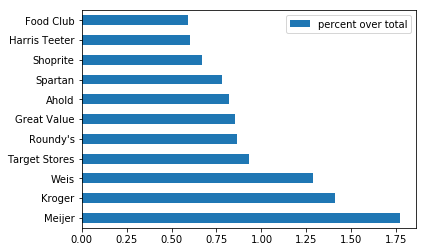

In [13]:
brands2.plot.barh(y='percent over total')

Percentage of products with palm oil

In [14]:
df_palm = df.loc[:, ['product_name', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']].dropna()
df_palm.set_index('product_name', inplace=True)
df_palm.head()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
product_name,,
Peanuts,0.0,0.0
Organic Salted Nut Mix,0.0,0.0
Organic Polenta,0.0,0.0
Breadshop Honey Gone Nuts Granola,0.0,0.0
Organic Long Grain White Rice,0.0,0.0


In [15]:
def contains_palm(x):
    if x>0:
        return True
    return False

In [16]:
df_palm = df_palm.applymap(contains_palm)
df_palm.head()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
product_name,,
Peanuts,False,False
Organic Salted Nut Mix,False,False
Organic Polenta,False,False
Breadshop Honey Gone Nuts Granola,False,False
Organic Long Grain White Rice,False,False


In [17]:
df_palm['contains palm'] = df_palm.ingredients_from_palm_oil_n | df_palm.ingredients_that_may_be_from_palm_oil_n
df_palm.head()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,contains palm
product_name,,,
Peanuts,False,False,False
Organic Salted Nut Mix,False,False,False
Organic Polenta,False,False,False
Breadshop Honey Gone Nuts Granola,False,False,False
Organic Long Grain White Rice,False,False,False


In [18]:
df_cpalm = pd.DataFrame(index=['palm', 'no palm'], columns=['number'])
df_cpalm

,number
palm,NaN
no palm,NaN


In [19]:
df_cpalm.loc['palm'] = df_palm['contains palm'].sum()
df_cpalm.loc['no palm'] = (~df_palm['contains palm']).sum()
df_cpalm

,number
palm,4024
no palm,163714


In [20]:
df_cpalm['percentage'] = df_cpalm.number/df_cpalm.number.sum()*100.
df_cpalm

,number,percentage
palm,4024,2.398979
no palm,163714,97.601021


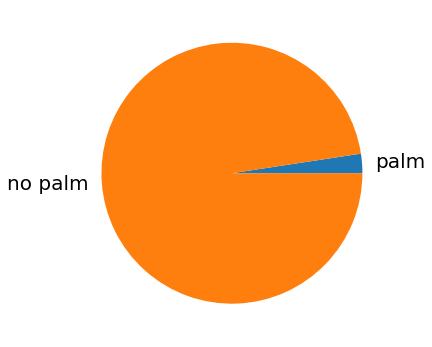

In [21]:
ax = df_cpalm.percentage.plot.pie(figsize=(6, 6), fontsize=20)
ax.set_ylabel('')
plt.show()

Origin of food

In [22]:
origins = df.origins
origins.unique()

array(['Unknown', 'United States', 'Washington,USA', 'Thailand',
       'Thailande', 'China,Kenya', 'USA', 'Toledo,Ohio,United States',
       'Ohio,USA', 'Colombia,India,Philippines,Sri Lanka',
       'USA,Canada,Argentina', 'Kenya', 'Afrique du Sud', 'Kenia',
       'Taiwan,Imported Unknown', 'Taiwan', 'Texas,USA',
       'Plano,Texas,USA', 'Arden Hilss,Minnesota', 'Hackettstown,NJ',
       'Peru', 'Broomfield CO USA', 'República Dominicana', 'US',
       'Greece,Spain,Portugal', 'North America', 'California,USA',
       'Brazil', 'USA,Canada', 'India', 'Italy', 'Switzerland',
       'Delaware,USA', 'Molise,Italy', 'Spain,Italy,Greece,Tunisia',
       'Greece', 'California,United States', 'É. - U.A.', 'Italie',
       'Japon', 'Sacramento,California,United States', 'China',
       'Indonesia', 'Italia', 'Fairbury,Illinois,USA', 'É.-U.A.',
       'United Kingdom', 'Hawaii,USA', 'Indéterminé,Undetermined',
       'Peru,Mexico,Sri Lanka,Ecuador', 'Austria', 'Royaume uni',
       'Canada

In [23]:
def transform_origins(s):
    # Remove non-country data
    s = s.str.replace('Washington,', '')    
    s = s.str.replace('Toledo,', '')
    s = s.str.replace('Ohio,', '')
    s = s.str.replace('Texas,', '')
    s = s.str.replace('Plano,', '')
    s = s.str.replace('Arden Hilss,Minnesota', 'United States')
    s = s.str.replace('Hackettstown,NJ', 'United States')
    s = s.str.replace('Broomfield CO ', '')
    s = s.str.replace('California,', '')
    s = s.str.replace('CA,', '')
    s = s.str.replace('Sacramento,', '')
    s = s.str.replace('Delaware,', '')
    s = s.str.replace('Molise,', '')
    s = s.str.replace('Hawaii,', '')
    s = s.str.replace('Worcestershire,', '')
    s = s.str.replace('12250 Roquefort-sur-Soulzon,Aveyron,Midi-Pyrénées,', '')
    s = s.str.replace("Laiterie d'échiré,Deux-Sèvres,", '')
    s = s.str.replace('Chestnut,Illinois,', '')
    s = s.str.replace('Fairbury,Illinois,', '')        
    s = s.str.replace('Belgian Chocolate', 'Belgium')
    s = s.str.replace('New York,', '')
    s = s.str.replace('England', 'United Kingdom')
    s = s.str.replace('Bristol,', '')
    s = s.str.replace('Yucatán,', '')
    
    s = s.str.replace('É\. *- *U\.A\.', 'United States')
    
    # Translate country names
    s = s.str.replace('Lituanie', 'Lithuania')
    s = s.str.replace('Taïwan', 'Taiwan')
    s = s.str.replace('MEXIQUE', 'Mexico')
    s = s.str.replace('[Cc]olombie', 'Colombia')
    s = s.str.replace('Royaume uni', 'United Kingdom')
    s = s.str.replace('North America', 'United States')
    s = s.str.replace('Itali[ae]', 'Italy')
    s = s.str.replace('Japon', 'Japan')
    s = s.str.replace('Tha[iï]lande', 'Thailand')
    s = s.str.replace('Indonésie', 'Indonesia')
    s = s.str.replace('Afrique du [Ss]ud', 'South Africa')
    s = s.str.replace('Kenia', 'Kenya')
    s = s.str.replace('República Dominicana', 'Dominican Republic')
    
    s = s.str.replace(r'\bUSA\b', 'United States')
    s = s.str.replace(r'\bUS\b', 'United States')
    s = s.str.replace(r'\bUK\b', 'United Kingdom')
    
    s = s.str.replace('Indéterminé,Undetermined', 'Unknown')
    s = s.str.replace('Taiwan,Imported Unknown', 'Unknown')
    s = s.str.replace("Union Européenne,Hors Union Européenne,Beurre d'Union Européenne", 'Unknown')
    
    return s

In [24]:
origins = transform_origins(origins)


In [25]:
origins2 = origins.str.split(',', expand=True).stack().to_frame(name='origins')
origins2['products'] = 1
origins2 = origins2.groupby('origins').count()
origins2.sort_values(by='products', ascending=False, inplace=True)

In [26]:
origins2.drop(index='Unknown', inplace=True)

In [27]:
origins2.loc['products'] = origins2.products/origins2.products.sum()*100.
origins2.rename(columns={'products': 'Percent of products'}, inplace=True)
origins2.head()

,Percent of products
origins,
United States,54.0
Thailand,13.0
United Kingdom,8.0
Italy,7.0
India,7.0


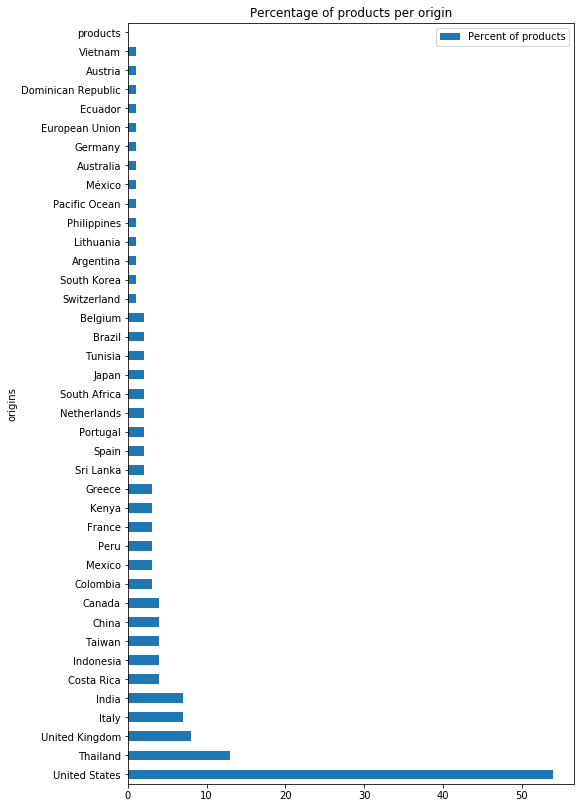

In [28]:
origins2.plot.barh(figsize=(8, 14), title='Percentage of products per origin')
plt.show()